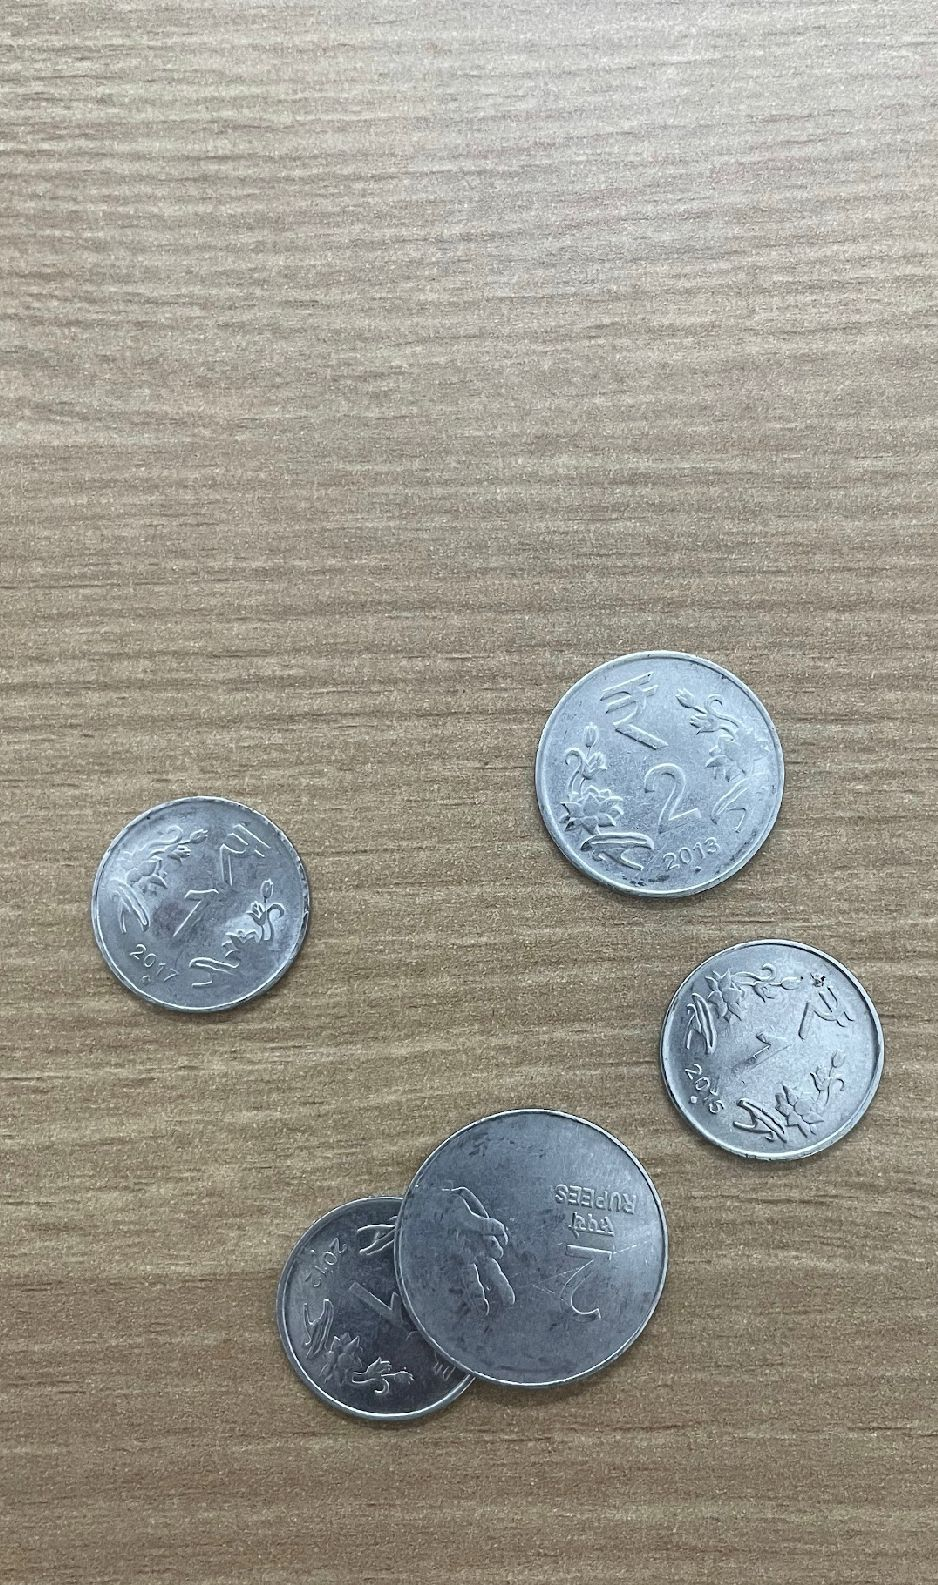

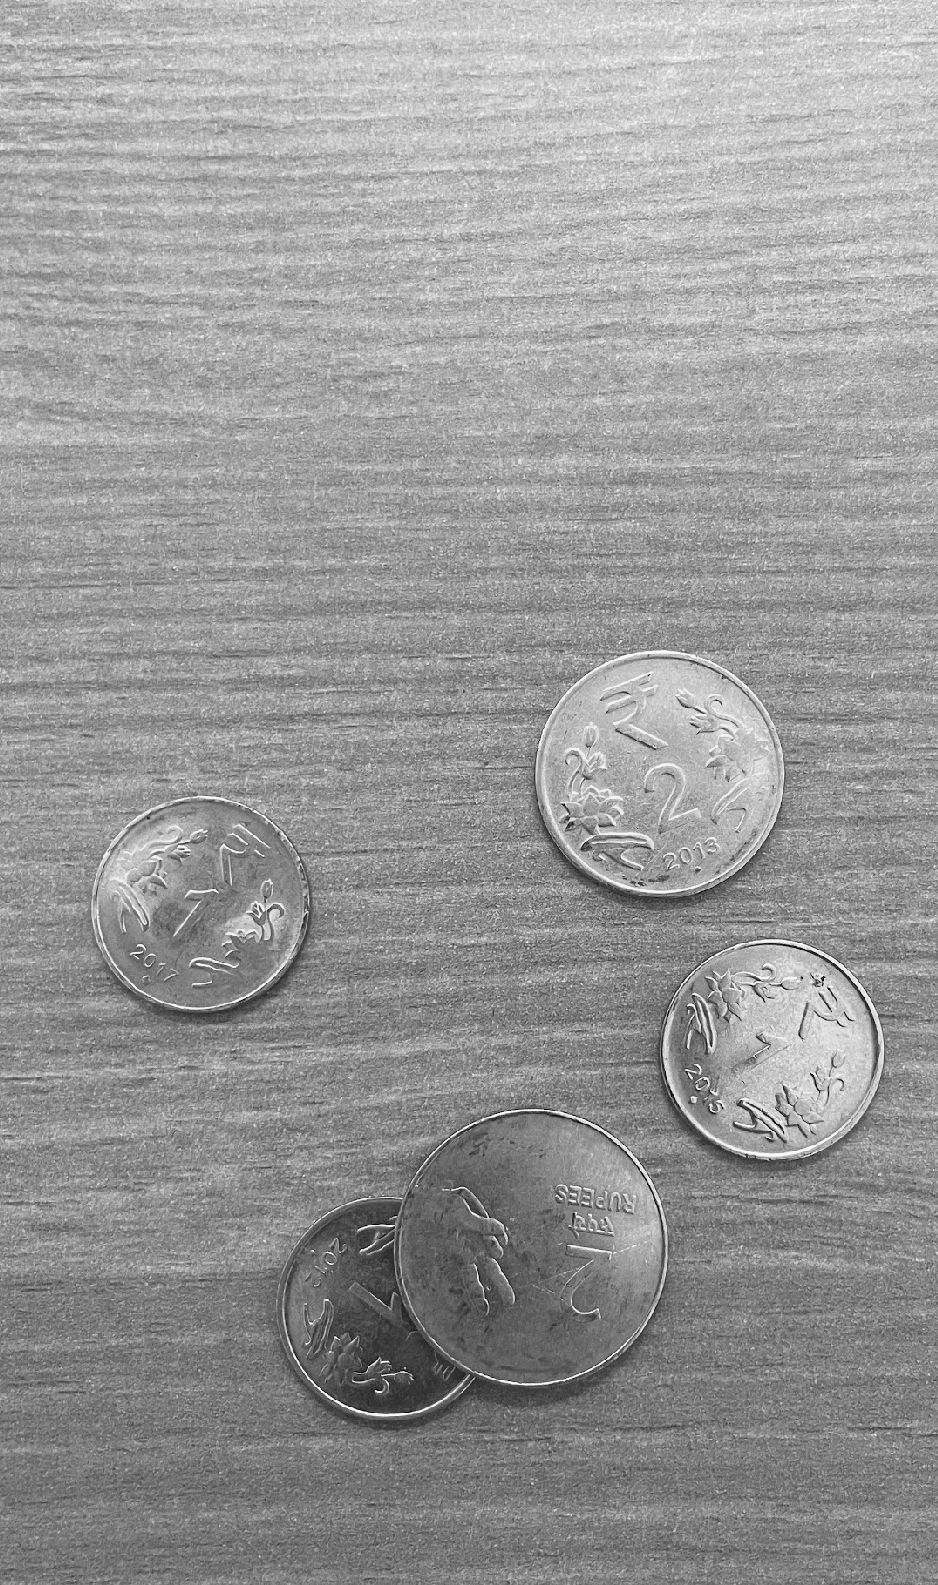

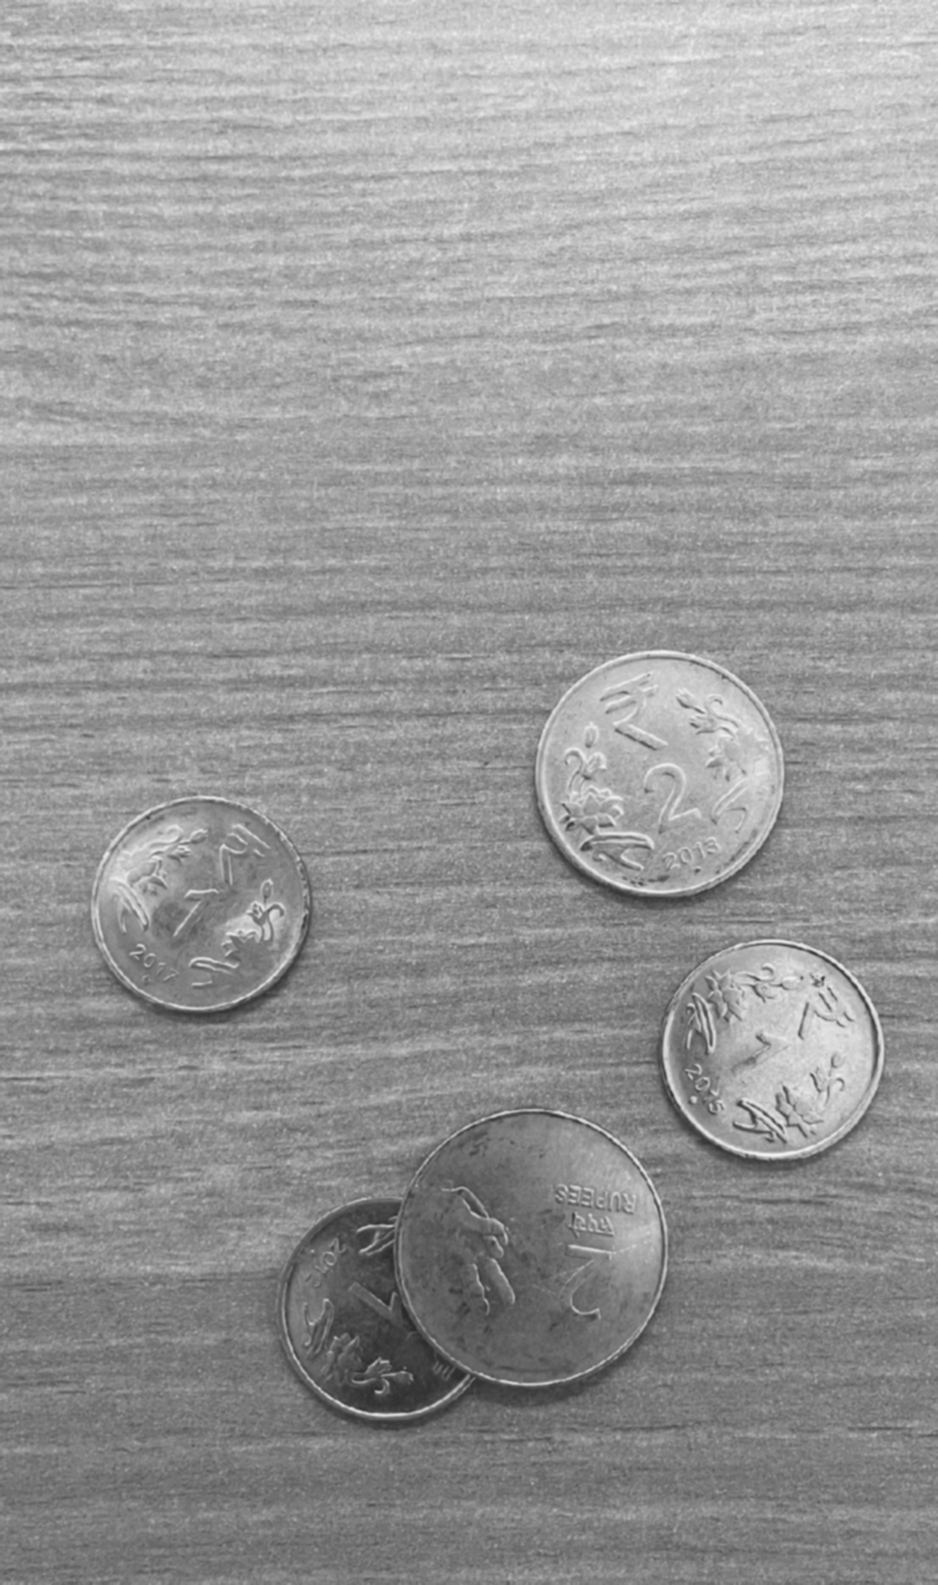

Circle at (528, 1248) with diameter 272 pixels, which is approximately 2.90 cm.
Circle at (660, 774) with diameter 248 pixels, which is approximately 2.64 cm.
Circle at (768, 1050) with diameter 212 pixels, which is approximately 2.26 cm.
Circle at (202, 906) with diameter 214 pixels, which is approximately 2.28 cm.
Circle at (388, 1308) with diameter 208 pixels, which is approximately 2.22 cm.


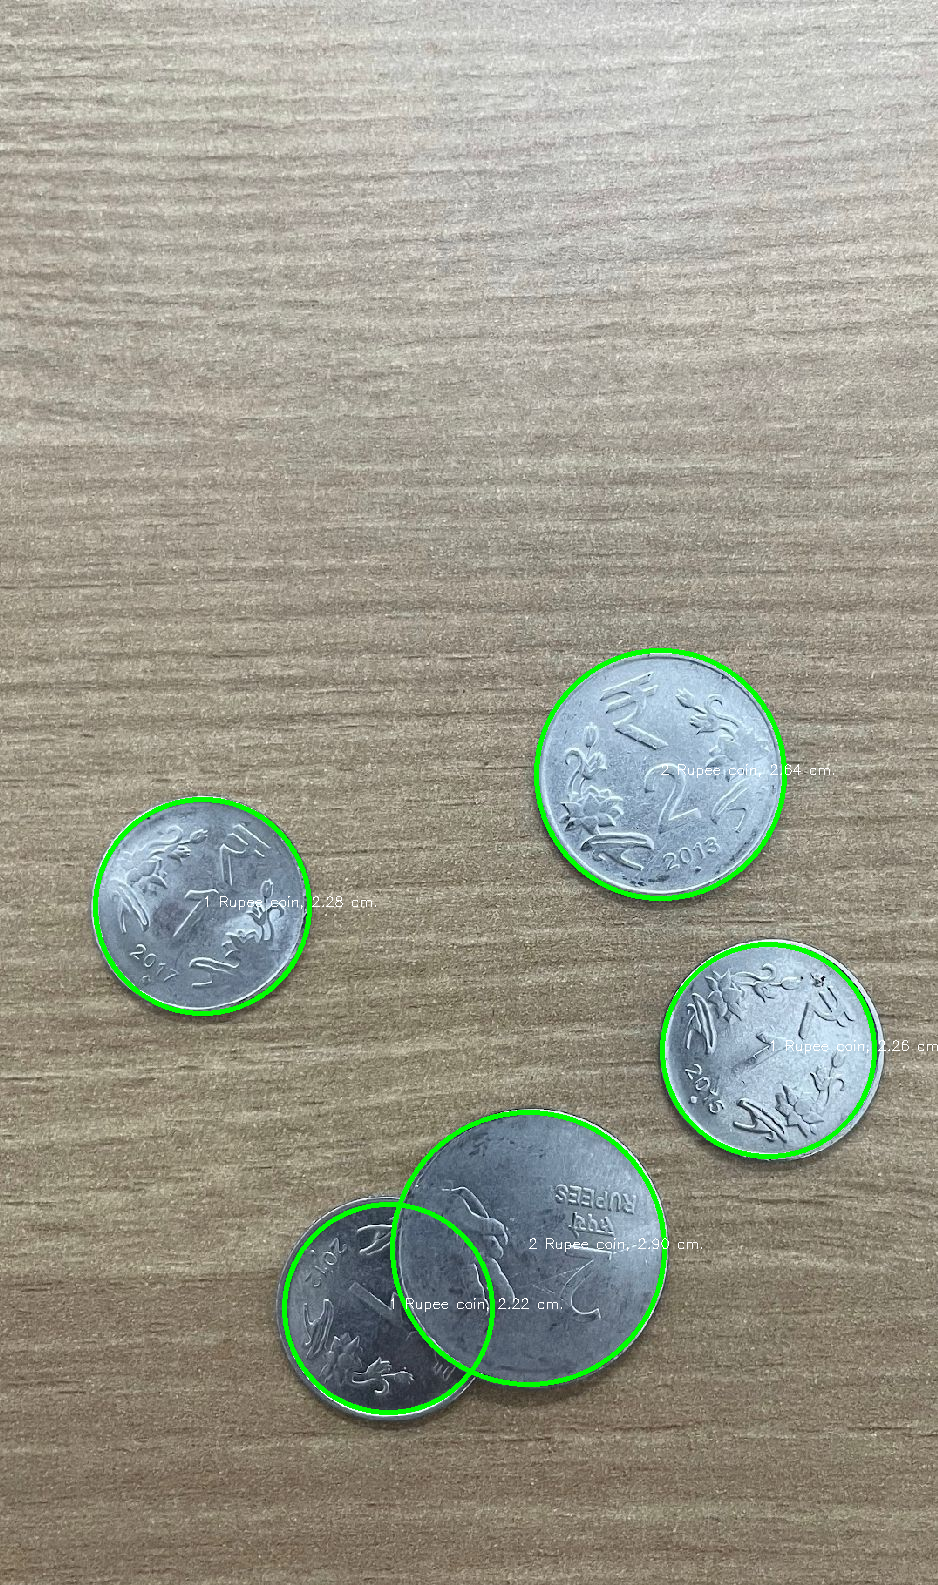

Number of 2 Rupee Coins: 2
Number of 1 Rupee Coins: 3
Net Value: 7
Diameters in cm: [2.899786780383795, 2.6439232409381663, 2.260127931769723, 2.281449893390192, 2.2174840085287846]
Number of coins detected: 5


In [ ]:
# Importing necessary libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Initializing necessary counters
one_rupee = 0
two_rupee = 0

# Reading the image
image = cv2.imread("/content/ME03-P1.jpeg")

# Display the original image
cv2_imshow(image)

# Converting the given image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
cv2_imshow(gray)

# Applying Gaussian Blur to minimize noise and help in circle detection
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Display the blurred image
cv2_imshow(gray_blurred)

# Using Hough Circles to detect the circles
circles = cv2.HoughCircles(
    gray_blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=40, param1=130, param2=35, minRadius=100, maxRadius=137
)

# If circles are found, iterating through them
if circles is not None:
    circles = np.uint16(np.around(circles))

    # Calculate the scaling factor (pixels to cm)
    image_width_pixels = 938
    real_width_cm = 10
    scale = real_width_cm / image_width_pixels

    diameters_cm = []

    for i in circles[0, :]:
        # Get circle parameters: the center and the radius
        center = (i[0], i[1])
        radius = i[2]

        # Calculating the diameter in cm
        diameter_cm = 2 * radius * scale
        diameters_cm.append(diameter_cm)

        # Printing the circle parameters and area
        print(f"Circle at {center} with diameter {2*radius} pixels, which is approximately {diameter_cm:.2f} cm.")

        # Drawing the circle on the original image with its denomination
        cv2.circle(image, center, radius, (0, 255, 0), 3)
        if diameter_cm > 2.4:  # Assuming 2 rupee coins are larger than 2.4 cm in diameter
            two_rupee += 1
            text = f"2 Rupee coin, {diameter_cm:.2f} cm."
        else:
            one_rupee += 1
            text = f"1 Rupee coin, {diameter_cm:.2f} cm."

        font = cv2.FONT_HERSHEY_SIMPLEX
        font_size = 0.46  # Reduced font size
        font_thickness = 1  # Reduced font thickness
        font_color = (255, 255, 255)
        cv2.putText(image, text, (i[0], i[1]), font, font_size, font_color, font_thickness)

    # Displaying the result
    cv2_imshow(image)
    print(f"Number of 2 Rupee Coins: {two_rupee}")
    print(f"Number of 1 Rupee Coins: {one_rupee}")
    print(f"Net Value: {(two_rupee * 2) + (one_rupee * 1)}")
    print(f"Diameters in cm: {diameters_cm}")
else:
    print('No circles found.')

# Additional coin counting
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    num_coins = len(circles)
    print(f"Number of coins detected: {num_coins}")
else:
    print("No circles (coins) were found.")
